# Figure Reproducibility
   ### By: JUSTFAIR MSU

## Description: 

This data is the data we were able to scrape from the Michigan Judicial Institute's Website, which includes data from Court of Appeals and the Michigan Supreme Court. Although we cannot answer questions about bias in sentencing with this data, it can tell us other things about Michigan judicial practices. This notebook contains information about a visualization representing the location of Supreme Court and Court of Appeals cases in the states. 


## Instructions for Installations:
You will need to make sure the following is installed:

- pandas
- matplotlib.pyplot
- numpy

If you do not already have these libraries downloaded, please run the cell below:

In [7]:
# Installs pandas
! pip install pandas

# Installs matplotlib
! pip install matplotlib

# Install numpy 
! pip install numpy

^C
Traceback (most recent call last):
  File "/Users/alicekrupczak/opt/anaconda3/bin/pip", line 7, in <module>
    from pip._internal.cli.main import main
  File "/Users/alicekrupczak/opt/anaconda3/lib/python3.9/site-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/Users/alicekrupczak/opt/anaconda3/lib/python3.9/site-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/Users/alicekrupczak/opt/anaconda3/lib/python3.9/site-packages/pip/_internal/cli/main_parser.py", line 8, in <module>
    from pip._internal.cli import cmdoptions
  File "/Users/alicekrupczak/opt/anaconda3/lib/python3.9/site-packages/pip/_internal/cli/cmdoptions.py", line 23, in <module>
    from pip._internal.cli.parser import ConfigOptionParser
  File "/Users/alicekrupczak/opt/anaconda3/lib/python3.9/site-packages/pip/_internal/cli/parser.py", line 12, in

## Code to read in data:

Because this dataset is spread across multiple files, they are read in separately and combined into one Pandas DataFrame.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
min_case = 999
max_case = 31499
cases_per_file = 500

cases = [case_no for case_no in range(min_case, max_case, cases_per_file)]

df_list = []

for case_no in cases:
    file_path = f'CoA/court_of_appeals_case{case_no}.json'
    try:
        df = pd.read_json(file_path).T
        df_list.append(df)
    except:
        continue
    
df = pd.concat(df_list, axis=0, ignore_index=True)
df.head()

,findId,allParties,attorneys,barNumbers,caseLastUpdated,caseSearchUrl,caseTypes,consolidatedCases,courtOfAppealsCaseId,courtOfAppealsCaseNumber,...,message,publications,supremeCourtCaseId,supremeCourtCaseNumber,supremeCourtParties,supremeCourtPartyNames,supremeCourtStatus,supremeCourtOrderDockets,supremeCourtOrderDocketsWithDocuments,title
0,case-details-159176,"[PEOPLE OF MICHIGAN, HAYNES MAURICE JOHN, JONE...","[LEONARD ROBERT F-DISBARRED, SORDYL EUGENE E]","[16565, 20790]",None,/case-search/,[],[],1,1,...,None,"[005 Mich App 641, 007 Mich App 91]",None,None,[],[],None,[],[],PEOPLE V MAURICE JOHN HAYNES
1,case-details-219989,"[HOUGHS CARL E, MACKIE JOHN C COMMR]","[MIKESELL WILLARD L, KELLEY FRANK J]","[17712, 15818]",None,/case-search/,[],[],2,2,...,None,[001 Mich App 554],None,None,[],[],None,"[{'panel': None, 'comments': None, 'court': 1,...",[],HOUGHS CARL E V MACKIE JOHN C
2,case-details-952,"[ROSE EDWARD, CORPORATION SECUR COMM]","[LEVIN CHARLES L (RETIRED), KELLEY FRANK J]","[16600, 15818]",None,/case-search/,[],"[{'caseNumber': 5, 'caseUrl': '/c/courts/coa/c...",3,3,...,None,[],None,None,[],[],None,[],[],ROSE EDWARD V MICH CORP & SECURITI...
3,case-details-953,"[AUDREY HOMES INC, CORPORATION SECUR COMM]","[LEVIN CHARLES L (RETIRED), KELLEY FRANK J]","[16600, 15818]",None,/case-search/,[],[],4,4,...,None,[],None,None,[],[],None,[],[],AUDREY HOMES INC V MICH CORP & SECURITI...
4,case-details-954,[],[],[],None,/case-search/,[],"[{'caseNumber': 3, 'caseUrl': '/c/courts/coa/c...",5,5,...,None,[14 Mich App 330],None,None,[],[],None,[],[],ROSE EDWARD V MICH CORP & SE


## Code to generate the required data: 

Court names and the frequency with which they occur are extrated using the following code.

In [19]:
courts_list = df['courts']
courts_names = []

for court in courts_list:
    try:
        courts_names.append(court[0])
    except:
        continue

unique, counts = np.unique(pd.array(courts_names), return_counts=True)

frequency_dictionary = {}
for i in range(len(unique)):
    frequency_dictionary[unique[i]] = counts[i]
    
frequency_dictionary_sorted = dict(sorted(frequency_dictionary.items(), key=lambda item: item[1], reverse = True))

## Code to generate the visualization: 

<BarContainer object of 109 artists>

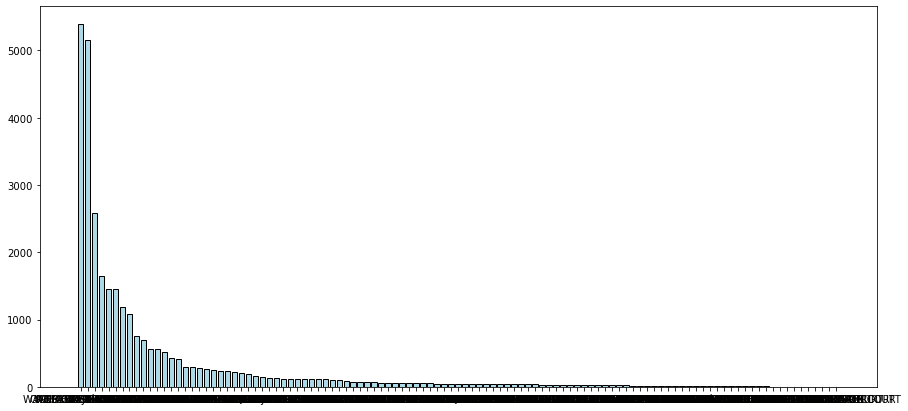

In [26]:
fig = plt.figure(figsize = (15, 7))
ax = fig.add_subplot(111)
ax.bar(frequency_dictionary_sorted.keys(), frequency_dictionary_sorted.values(), 
        align='center', 
       color = 'lightblue', 
       edgecolor = 'black',
       )

## Code to add formating (axes labels, titles, etc): 

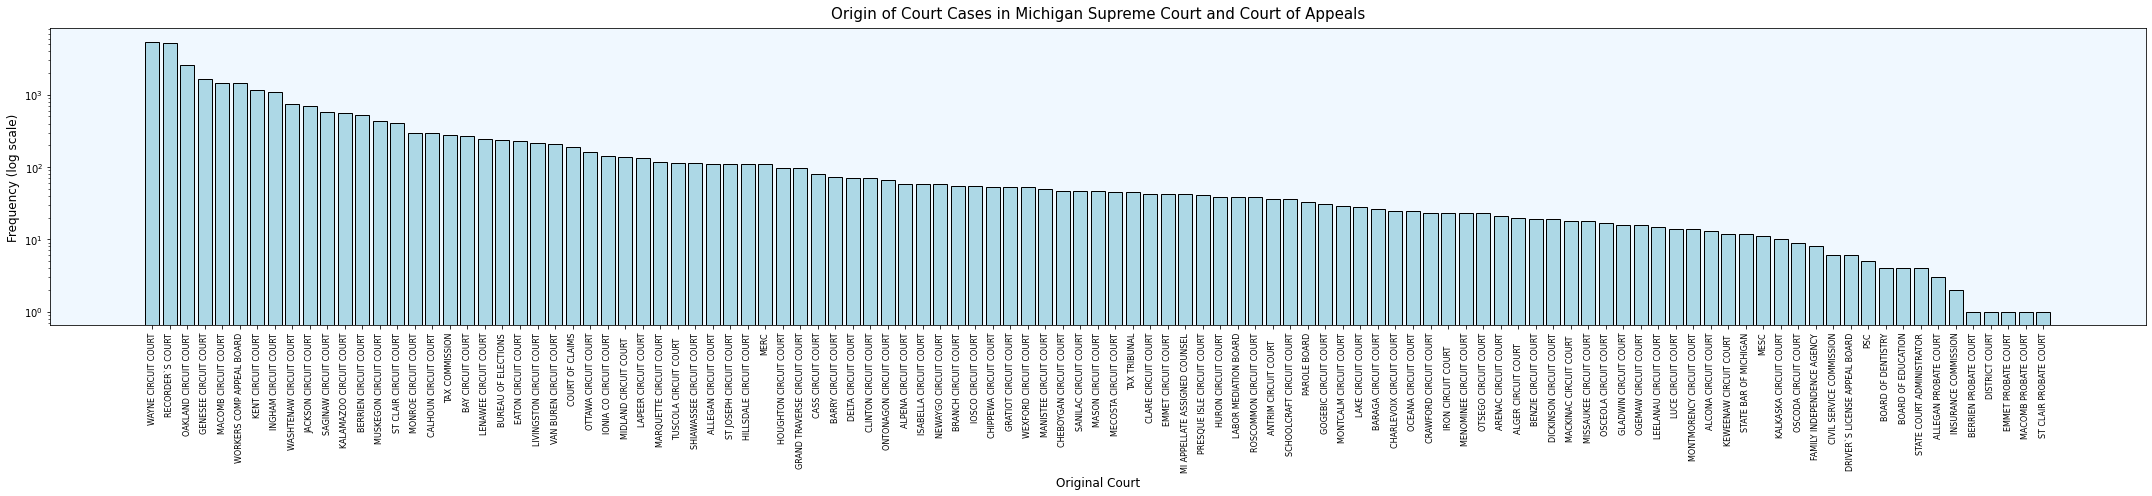

In [38]:
## Visualization Code:
fig = plt.figure(figsize = (30, 7)) # Change the figure size by changing the numbers in this line.
ax = fig.add_subplot(111)
ax.bar(frequency_dictionary_sorted.keys(), frequency_dictionary_sorted.values(), 
        align='center', 
       color = 'lightblue', # Color of bar fill
       edgecolor = 'black', # Color of bar edge
       )

## Formatting Code:
ax.set_facecolor('aliceblue') # Change background color here
plt.xlabel('Original Court', size = 12) # Change X label here
plt.ylabel('Frequency (log scale)', size = 12) # Change Y label here
plt.yscale('log') # Change Y scale here
plt.title('Origin of Court Cases in Michigan Supreme Court and Court of Appeals', pad = 10, size = 15) # Change title here 
plt.xticks(rotation = 90, size = 8) # Formatting to edit x-ticks. 

plt.tight_layout()

## Code to export a file: 

In [39]:
plt.savefig("CourtOriginHistogram.png", dpi = 400) 

<Figure size 432x288 with 0 Axes>